In [2]:
# Import necessary modules/libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Define function to plot 2D vector fields
def plot_2d_vector_field(X, Y, U, V, title):
    plt.figure(figsize=(6, 6))
    plt.quiver(X, Y, U, V)     #provides arrows
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.show()

In [4]:
# Create a meshgrid for x and y
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x, y)

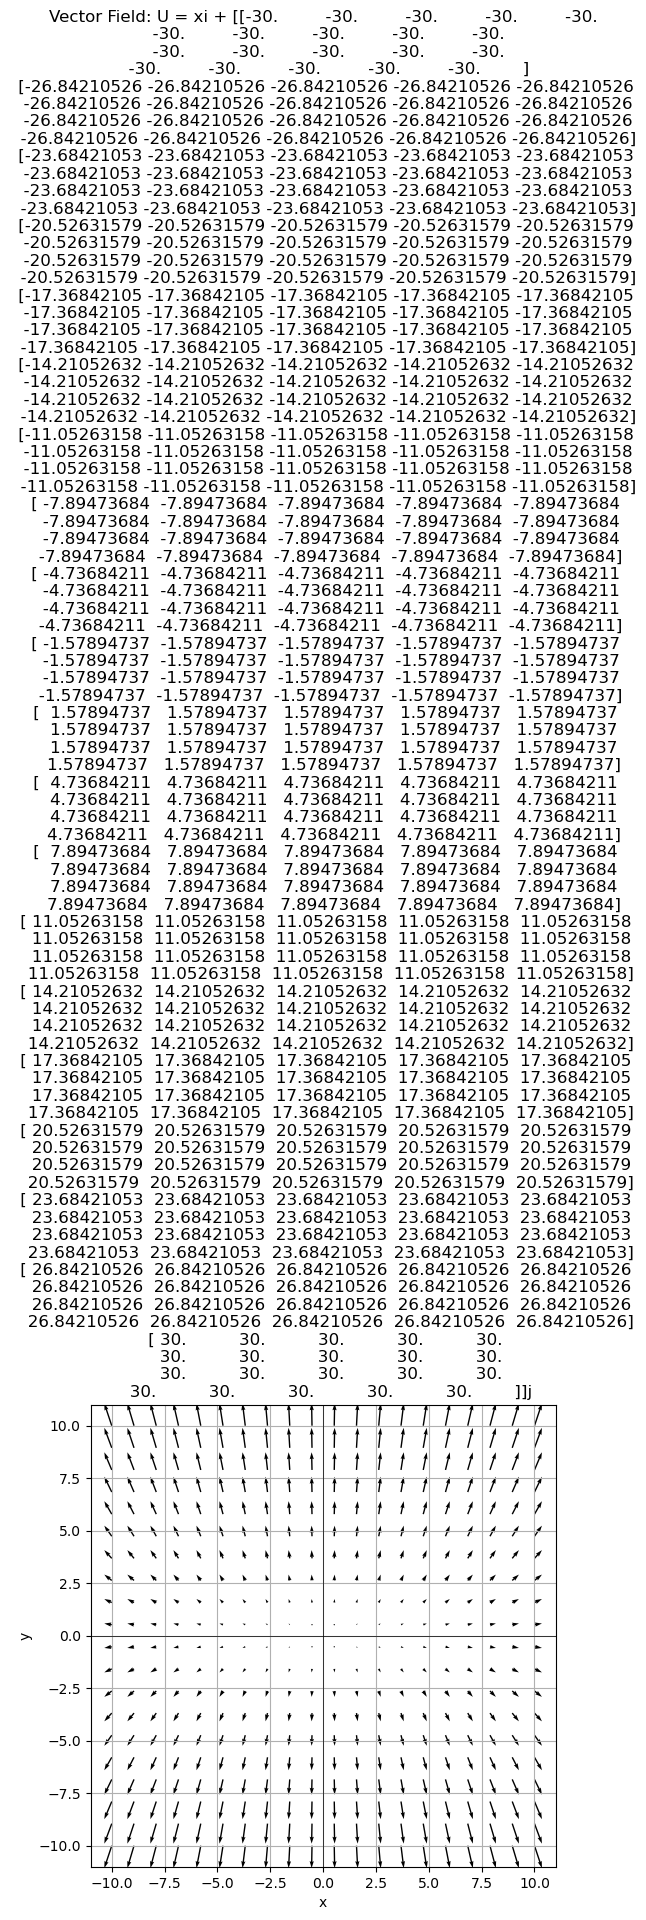

In [8]:
# Vector field a) U = xi + yj
U = X
V = 3*Y
plot_2d_vector_field(X, Y, U, V, f'Vector Field: U = xi + {V}j')

In [ ]:
# Vector field b) U = -xi - yj
U = -X
V = -Y
plot_2d_vector_field(X, Y, U, V, 'Vector Field: U = -xi - yj')

# Function to plot 3D vector field
def plot_3d_vector_field(X, Y, Z, U, V, W, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, U, V, W)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(title)
    plt.show()

# Create a meshgrid for x, y, z for 3D vector field
z = np.linspace(-10, 10, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Vector field c) U = xi + yj + zk
U = X
V = Y
W = Z
plot_3d_vector_field(X, Y, Z, U, V, W, 'Vector Field: U = xi + yj + zk')